# Program Header

In [1]:
import pandas as pd
import numpy as np
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from header import *

In [2]:
data_root = initialize_data_root("AH")

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

# Import

In [69]:
q3mergeddata = pd.read_csv(data_root + '02-build/clean/2019q3/2019q3merged.csv')

In [18]:
q3mergeddata.describe()

,Unnamed: 0,dyrqt,cik,sic,AccountsPayableCurrent,AccountsReceivableNetCurrent,AccruedLiabilitiesCurrent,AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment,AccumulatedOtherComprehensiveIncomeLoss,AdditionalPaidInCapital,...,SubleaseIncome,TotalLiabilities,TreasuryStockShares,TreasuryStockValue,WeightedAverageNumberOfDilutedSharesOutstanding,WeightedAverageNumberOfSharesOutstandingBasic,7_before,7_after,difference,per
count,3654.00000,3654.000000,3.654000e+03,3654.000000,3.654000e+03,3.654000e+03,3.654000e+03,3.654000e+03,3.654000e+03,3.654000e+03,...,3.654000e+03,3.654000e+03,3.654000e+03,3.654000e+03,3.654000e+03,3.654000e+03,3654.000000,3654.000000,3654.000000,3654.000000
mean,1826.50000,201901.926929,1.080462e+06,4754.451560,3.422570e+08,2.472407e+08,1.281292e+08,7.657287e+08,-1.428868e+08,1.320539e+09,...,1.346614e+06,4.251613e+09,9.424437e+09,6.589057e+08,1.617906e+08,9.752382e+07,42.675712,42.236157,-0.439555,-0.013332
std,1054.96327,4.327906,5.026887e+05,1949.270141,2.014718e+09,1.121960e+09,8.929623e+08,5.474543e+09,1.109331e+09,4.746623e+09,...,1.638308e+07,3.471621e+10,5.687666e+11,5.653633e+09,1.947937e+09,3.395596e+08,117.501430,115.877852,6.494836,0.122079
min,0.00000,201704.000000,1.750000e+03,100.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.884100e+10,-8.903000e+08,...,-1.600000e+07,0.000000e+00,-3.000000e+01,-2.712552e+06,0.000000e+00,0.000000e+00,0.000100,0.000100,-198.360596,-0.735974
25%,913.25000,201902.000000,8.368838e+05,2851.000000,5.552500e+05,0.000000e+00,0.000000e+00,0.000000e+00,-1.733850e+07,5.036150e+07,...,0.000000e+00,5.992677e+06,0.000000e+00,0.000000e+00,1.286747e+07,0.000000e+00,5.952656,5.785000,-0.926235,-0.057550
50%,1826.50000,201902.000000,1.115025e+06,4813.000000,9.059500e+06,2.597068e+06,5.818775e+05,0.000000e+00,-1.000000e+03,2.605400e+08,...,0.000000e+00,2.081895e+08,0.000000e+00,0.000000e+00,3.734500e+07,2.152873e+07,18.685956,18.253000,-0.079570,-0.011142
75%,2739.75000,201902.000000,1.505036e+06,6331.000000,1.006935e+08,9.306000e+07,2.675975e+07,9.507925e+07,0.000000e+00,8.938802e+08,...,0.000000e+00,1.622725e+09,2.119002e+05,7.932020e+06,9.266450e+07,7.444650e+07,45.924282,45.254580,0.321500,0.024123
max,3653.00000,201903.000000,1.773383e+06,8744.000000,4.587100e+10,2.952400e+10,2.614000e+10,2.028420e+11,2.398200e+10,1.251090e+11,...,4.430000e+08,1.723351e+12,3.438100e+13,2.259700e+11,9.459960e+10,7.323000e+09,4082.174902,3883.814307,70.534009,2.311597


In [19]:
q3mergeddata.shape

(3654, 102)

### Logistic Regression for stock price prediction, nothing done with data

In [24]:
labels = list(q3mergeddata.columns[10:99])

In [74]:
q3mergeddata['movement'] = np.where(q3mergeddata['difference'] >= 0 , int(1.00), int(0.00))
q3mergeddata_processed  = pd.DataFrame(preprocessing.scale(q3mergeddata[q3mergeddata.columns[10:len(q3mergeddata.columns) - 4]]), columns =q3mergeddata.columns[10:len(q3mergeddata.columns) - 4] )


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [75]:
X = pd.DataFrame(q3mergeddata[labels].copy())
Y = pd.DataFrame(q3mergeddata['movement'].copy())

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


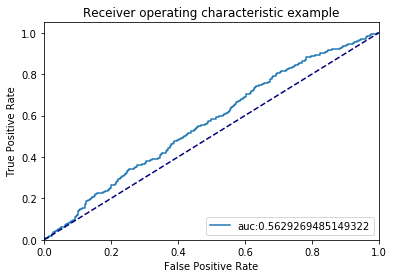

In [76]:
logreg = LogisticRegression()
logreg.fit(X_train, np.ravel(Y_train))

log_decision = logreg.decision_function(X_test)
log_fpr, log_tpr, _  = roc_curve(Y_test, log_decision)

log_auc = auc(log_fpr, log_tpr)

plt.figure()
plt.plot(log_fpr, log_tpr, label = 'auc:'+str(log_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [77]:
sum_stats = q3mergeddata.describe()

for i in labels:
    if(sum_stats[i].loc['50%'] == 0):
        q3mergeddata = q3mergeddata.drop(i, axis = 1)

In [78]:
labels = q3mergeddata.columns[10:len(q3mergeddata.columns) - 5]

X = pd.DataFrame(q3mergeddata[labels].copy())
Y = pd.DataFrame(q3mergeddata['movement'].copy())

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


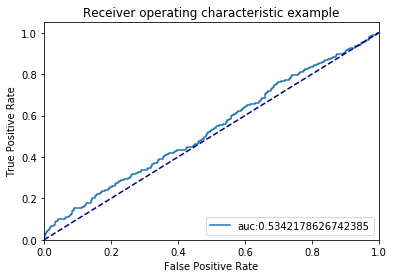

In [79]:
logreg = LogisticRegression()
logreg.fit(X_train, np.ravel(Y_train))

log_decision = logreg.decision_function(X_test)
log_fpr, log_tpr, _  = roc_curve(Y_test, log_decision)

log_auc = auc(log_fpr, log_tpr)

plt.figure()
plt.plot(log_fpr, log_tpr, label = 'auc:'+str(log_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [80]:
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

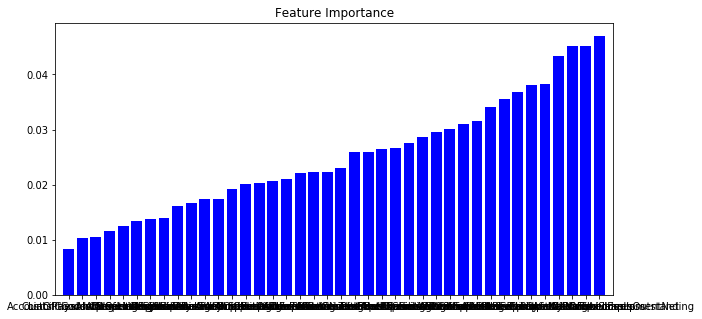

In [81]:
importance = dt.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(10,5))
plt.title("Feature Importance")
plt.bar(X_train.columns[indices], importance[indices], 
        color = 'b', align = 'center')
plt.xticks(range(X.shape[1]), X.columns[indices])
plt.xlim([-1, X.shape[1]])
plt.show()

In [82]:
for i in range(len(importance[indices])):
    if importance[indices][i] == 0:
        q3mergeddata = q3mergeddata.drop(X_train.columns[indices][i], axis = 1)

In [83]:
labels = q3mergeddata.columns[10:len(q3mergeddata.columns) - 5]

X = pd.DataFrame(q3mergeddata[labels].copy())
Y = pd.DataFrame(q3mergeddata['movement'].copy())

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


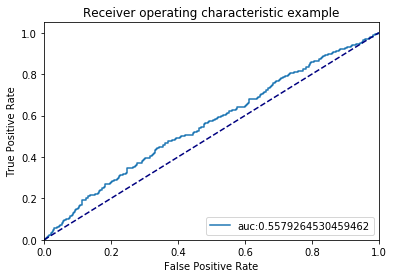

In [84]:
logreg = LogisticRegression()
logreg.fit(X_train, np.ravel(Y_train))

log_decision = logreg.decision_function(X_test)
log_fpr, log_tpr, _  = roc_curve(Y_test, log_decision)

log_auc = auc(log_fpr, log_tpr)

plt.figure()
plt.plot(log_fpr, log_tpr, label = 'auc:'+str(log_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Another attempt where dummy variable for missing variables was imputed, and the mean of each variable was replaced for 0 values. Restart the kernel and import data and go straight to this if want to try.

In [26]:
for i in labels:
    q3mergeddata[i+'_mv'] = np.where(q3mergeddata[i] == 0 , 1, 0)
    q3mergeddata[i] = q3mergeddata[i].replace(0, q3mergeddata[i].mean(skipna = True))

In [27]:
x = len(labels)
for i in range(x):
    labels.append(labels[i]+'_mv')

In [28]:
X = pd.DataFrame(q3mergeddata[labels].copy())
Y = pd.DataFrame(q3mergeddata['movement'].copy())

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


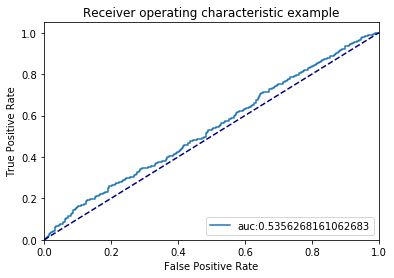

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, np.ravel(Y_train))

log_decision = logreg.decision_function(X_test)
log_fpr, log_tpr, _  = roc_curve(Y_test, log_decision)

log_auc = auc(log_fpr, log_tpr)

plt.figure()
plt.plot(log_fpr, log_tpr, label = 'auc:'+str(log_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


### Predict Company Size, Rerun import before doing this!

Predict Company Size Import Data

In [58]:
q3mergeddata['Clean_Number_of_Shares'] = q3mergeddata[['WeightedAverageNumberOfDilutedSharesOutstanding',
       'WeightedAverageNumberOfSharesOutstandingBasic']].max(axis = 1)

q3mergeddata['Clean_Number_of_Shares'] = q3mergeddata[['Clean_Number_of_Shares',
                                                       'CommonStockSharesOutstanding']].max(axis = 1)

q3mergeddata['Company_Value'] = q3mergeddata['Clean_Number_of_Shares'] * q3mergeddata['7_after']
q3mergeddata = q3mergeddata.drop(q3mergeddata[q3mergeddata.Company_Value == 0].index)
q3mergeddata = q3mergeddata.drop(['CommonStockSharesOutstanding','WeightedAverageNumberOfDilutedSharesOutstanding','WeightedAverageNumberOfSharesOutstandingBasic' ], axis = 1)
q3mergeddata['Company_Size'] = np.where(q3mergeddata['Company_Value'] > 5000000000, 1, 0)

In [44]:
q3mergeddata_processed  = pd.DataFrame(preprocessing.scale(q3mergeddata[q3mergeddata.columns[10:len(q3mergeddata.columns) - 7]]), columns =q3mergeddata.columns[10:len(q3mergeddata.columns) - 7] )

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [45]:
X = pd.DataFrame(q3mergeddata_processed.copy())
Y = pd.DataFrame(q3mergeddata['Company_Size'].copy())

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30)

In [46]:
logreg = LogisticRegression()
logreg.fit(X_train, np.ravel(Y_train))

log_decision = logreg.decision_function(X_test)
log_fpr, log_tpr, _  = roc_curve(Y_test, log_decision)

log_auc = auc(log_fpr, log_tpr)

lin_svm = SVC(kernel = 'linear')
lin_svm.fit(X_train, np.ravel(Y_train))

svm_decision = lin_svm.decision_function(X_test)
svm_fpr, svm_tpr, _  = roc_curve(Y_test, svm_decision)

svm_auc = auc(svm_fpr, svm_tpr)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


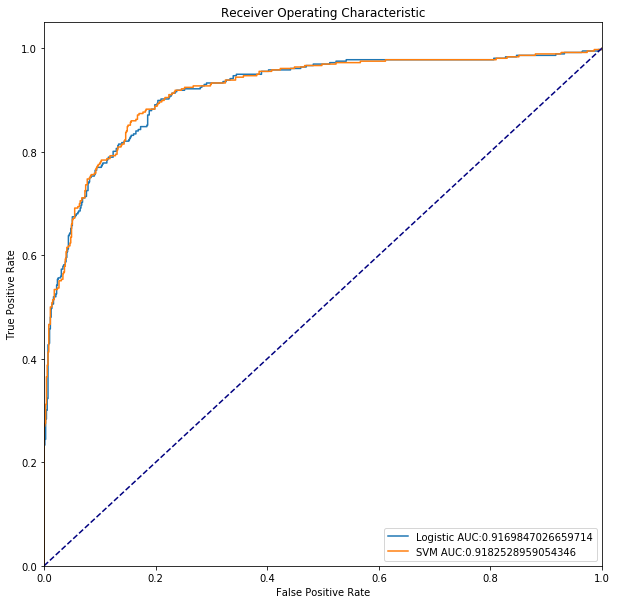

In [47]:
plt.figure(figsize = (10, 10))
plt.plot(log_fpr, log_tpr, label = 'Logistic AUC:'+str(log_auc))
plt.plot(svm_fpr, svm_tpr, label = 'SVM AUC:'+str(svm_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

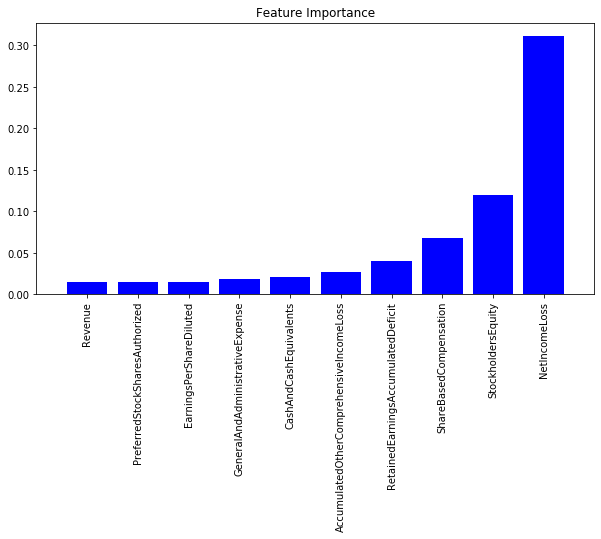

In [48]:
labels = q3mergeddata.columns[10:len(q3mergeddata.columns) - 7]

X_dt = pd.DataFrame(q3mergeddata_processed.copy())
Y_dt = pd.DataFrame(q3mergeddata['Company_Size'].copy())

X_train, X_test, Y_train, Y_test = train_test_split(X_dt,Y_dt, test_size = 0.30)

dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, Y_train)

importance = dt.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(10,5))
plt.title("Feature Importance")
plt.bar(X_train.columns[indices][- 10:], importance[indices][- 10:], 
        color = 'b', align = 'center')
plt.xticks(range(10), X.columns[indices][-10:], rotation = 90)
plt.xlim([-1, 10])
plt.show()

In [49]:
dt.score(X_test, Y_test)

0.8050609184629803

In [53]:
X = pd.DataFrame(q3mergeddata_processed.copy())
Y = pd.DataFrame(preprocessing.scale(q3mergeddata['Company_Value'].copy()))

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30)

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

y_pred = lin_reg.predict(X_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [54]:
mean_squared_error(Y_test, y_pred)

3.1790722098950384

In [55]:
r2_score(Y_test, y_pred)

0.04493613519566564

penalties on logistic regression

In [59]:
X = pd.DataFrame(q3mergeddata_processed.copy())
Y = pd.DataFrame(q3mergeddata['Company_Size'].copy())

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30)

logreg_1 = LogisticRegression(penalty = 'l1')
logreg_1.fit(X_train, np.ravel(Y_train))

log_1_decision = logreg.decision_function(X_test)
log_1_fpr, log_1_tpr, _  = roc_curve(Y_test, log_1_decision)

log_1_auc = auc(log_1_fpr, log_1_tpr)

logreg_2 = LogisticRegression(penalty = 'l2')
logreg_2.fit(X_train, np.ravel(Y_train))

log_2_decision = logreg.decision_function(X_test)
log_2_fpr, log_2_tpr, _  = roc_curve(Y_test, log_2_decision)

log_2_auc = auc(log_2_fpr, log_2_tpr)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


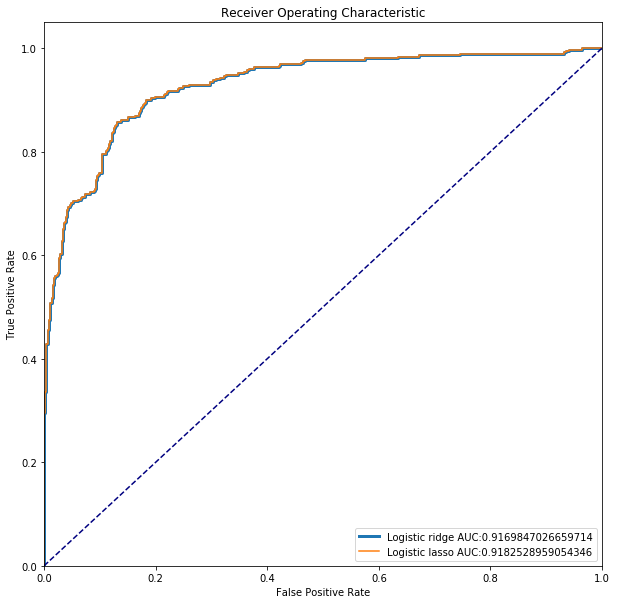

In [60]:
plt.figure(figsize = (10, 10))
plt.plot(log_1_fpr, log_1_tpr, label = 'Logistic ridge AUC:'+str(log_auc), lw = 3)
plt.plot(log_2_fpr, log_2_tpr, label = 'Logistic lasso AUC:'+str(svm_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Nonbinary classification


In [62]:
q3mergeddata['Clean_Number_of_Shares'] = q3mergeddata[['WeightedAverageNumberOfDilutedSharesOutstanding',
       'WeightedAverageNumberOfSharesOutstandingBasic']].max(axis = 1)

q3mergeddata['Clean_Number_of_Shares'] = q3mergeddata[['Clean_Number_of_Shares',
                                                       'CommonStockSharesOutstanding']].max(axis = 1)

q3mergeddata['Company_Value'] = q3mergeddata['Clean_Number_of_Shares'] * q3mergeddata['7_after']
q3mergeddata = q3mergeddata.drop(q3mergeddata[q3mergeddata.Company_Value == 0].index)
q3mergeddata = q3mergeddata.drop(['CommonStockSharesOutstanding','WeightedAverageNumberOfDilutedSharesOutstanding','WeightedAverageNumberOfSharesOutstandingBasic' ], axis = 1)
q3mergeddata['Company_Size_1'] = np.where(q3mergeddata['Company_Value'] <= 2000000000, 1, 0)
q3mergeddata['Company_Size_2'] = np.where(q3mergeddata['Company_Value'] >= 5000000000, 2, 1)
q3mergeddata['Company_Size'] = q3mergeddata['Company_Size_2'] - q3mergeddata['Company_Size_1']

q3mergeddata = q3mergeddata.drop(['Company_Size_1','Company_Size_2'], axis = 1)

q3mergeddata_processed  = pd.DataFrame(preprocessing.scale(q3mergeddata[q3mergeddata.columns[10:len(q3mergeddata.columns) - 7]]), columns =q3mergeddata.columns[10:len(q3mergeddata.columns) - 7] )



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


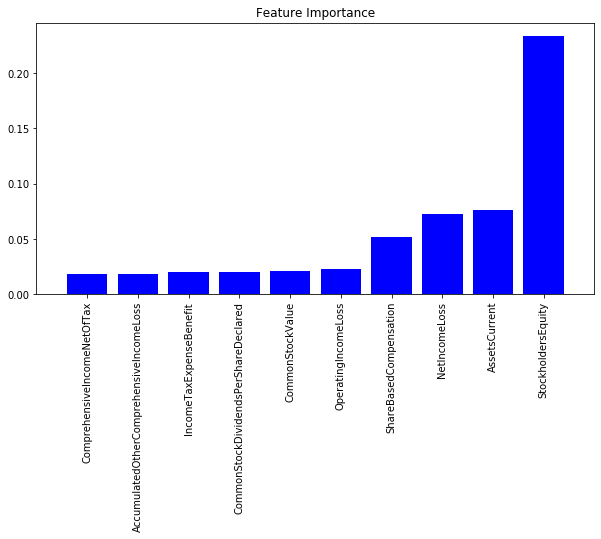

In [63]:
X_dt = pd.DataFrame(q3mergeddata_processed.copy())
Y_dt = pd.DataFrame(q3mergeddata['Company_Size'].copy())

X_train, X_test, Y_train, Y_test = train_test_split(X_dt,Y_dt, test_size = 0.30)

dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, Y_train)

importance = dt.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(10,5))
plt.title("Feature Importance")
plt.bar(X_train.columns[indices][- 10:], importance[indices][- 10:], 
        color = 'b', align = 'center')
plt.xticks(range(10), X.columns[indices][-10:], rotation = 90)
plt.xlim([-1, 10])
plt.show()

In [64]:
dt.score(X_test, Y_test)

0.6963448922211809

### 'Tertiary' Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion = 'entropy')
clf.fit(X_train, np.ravel(Y_train))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

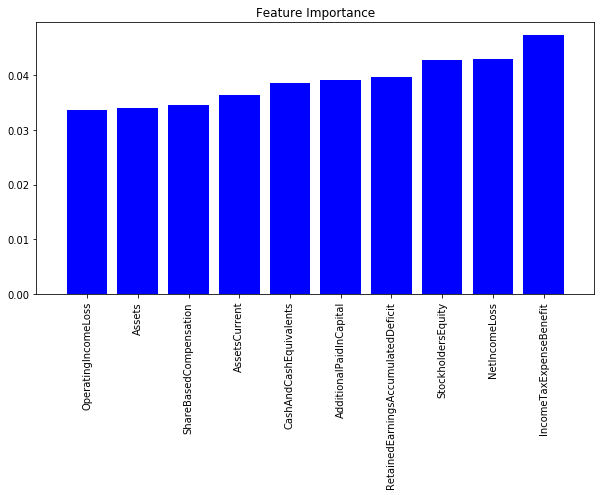

In [67]:
importance = clf.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(10,5))
plt.title("Feature Importance")
plt.bar(X_train.columns[indices][- 10:], importance[indices][- 10:], 
        color = 'b', align = 'center')
plt.xticks(range(10), X.columns[indices][-10:], rotation = 90)
plt.xlim([-1, 10])
plt.show()

In [68]:
clf.score(X_test, Y_test)

0.7741330834114339